In [1]:
import sys
import os
os.environ["CUDA_VISIBLE_DEVICES"]=""
import glob
sys.path.append("../AnalyzeCSV")
import numpy as np
from tifffile import imread
from CreateImages import TimelapseImage, TwoDImage, CountTimeLapseevents
try:
    from pathlib import Path
    Path().expanduser()
except (ImportError,AttributeError):
    from pathlib2 import Path

try:
    import tempfile
    tempfile.TemporaryDirectory
except (ImportError,AttributeError):
    from backports import tempfile

# Input the event names as they appear on the csv files

In [2]:
#Event File Append names
Division = 'ONETDivisionLocation'
Apoptosis = 'ONETApoptosisLocation'
Mature = 'ONETMatureLocation'
NonMature = 'ONETNonMatureLocation'
Macrocheate = 'ONETMacroKittyLocation'

# The block below opens all the csv files and needs the Image directory they correspond to. It will then generate images with dots showing where the event was found

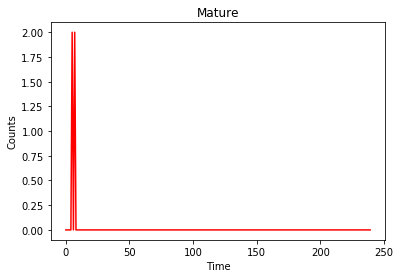

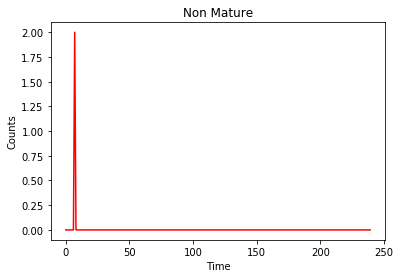

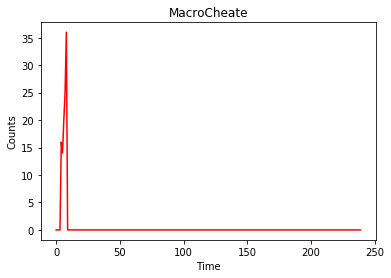

In [3]:
save_dir = '/home/sancere/VarunData/FROM_Victoire/VicTestMovie/BIGTest/ImageResults/'
csv_dir = '/home/sancere/VarunData/FROM_Victoire/VicTestMovie/BIGTest/CSVResults/'
image_dir =  '/home/sancere/VarunData/FROM_Victoire/VicTestMovie/BIGTest/'
basedir =  '/home/sancere/VarunData/FROM_Victoire/VicTestMovie/BIGTest/'  

Raw_path = os.path.join(image_dir,'*.tif')
X = glob.glob(Raw_path)




Path(save_dir).mkdir(exist_ok = True)


for image_file in X:

  image= imread(image_file)
  image = np.asarray(image)
  Name = os.path.basename((os.path.splitext(image_file)[0])) 

  #Division Events 
  csv_Name = Division + Name
  csv_file = csv_dir + csv_Name + '.csv'

  if os.path.exists(csv_file):

      emptyimage = np.zeros([image.shape[0], image.shape[1], image.shape[2]], dtype='uint16')
      TimelapseImage(csv_file, emptyimage, csv_Name, save_dir)
      CountTimeLapseevents(csv_file,emptyimage, csv_Name, save_dir)

  #Apoptosis Events 
  csv_Name = Apoptosis + Name
  csv_file = csv_dir + csv_Name + '.csv'

  if os.path.exists(csv_file):

      emptyimage = np.zeros([image.shape[0], image.shape[1], image.shape[2]], dtype='uint16')
      TimelapseImage(csv_file, emptyimage, csv_Name, save_dir)
      CountTimeLapseevents(csv_file,emptyimage, csv_Name, save_dir)
    
  #Mature Events 
  csv_Name = Mature + Name
  csv_file = csv_dir + csv_Name + '.csv'

  if os.path.exists(csv_file):

      emptyimage = np.zeros([image.shape[0], image.shape[1], image.shape[2]], dtype='uint16')
      TimelapseImage(csv_file, emptyimage, csv_Name, save_dir)
      CountTimeLapseevents(csv_file,emptyimage, 'Mature', save_dir)

  #NonMature Events 
  csv_Name = NonMature + Name
  csv_file = csv_dir + csv_Name + '.csv'

  if os.path.exists(csv_file):

      emptyimage = np.zeros([image.shape[0], image.shape[1], image.shape[2]], dtype='uint16')
      TimelapseImage(csv_file, emptyimage, csv_Name, save_dir)
      CountTimeLapseevents(csv_file,emptyimage, 'Non Mature', save_dir) 
    
 #Macrocheate Events 
  csv_Name = Macrocheate + Name
  csv_file = csv_dir + csv_Name + '.csv'

  if os.path.exists(csv_file):

      emptyimage = np.zeros([image.shape[0], image.shape[1], image.shape[2]], dtype='uint16')
      TimelapseImage(csv_file, emptyimage, csv_Name, save_dir)
      CountTimeLapseevents(csv_file,emptyimage, 'MacroCheate', save_dir)   
   
  